In [1]:
import numpy as np
from scipy.linalg import sqrtm
from matplotlib import pyplot as plt

from ExpInvQuEST import QuEST

%matplotlib notebook

## Set up true eigenvalues, following the example in Ledoit-Wolf

In [ ]:
p = 200
n = 500
r = p/n
z = np.linspace(0.0, 1.0, p)
z1 = z[z<=0.5]
exponent = 3
tau1 = 0.5 * (1.0 - (1.0 - (2.0 * z1) ** exponent) ** (1.0/exponent))
eigvals = 1.0 + 9.0 * np.concatenate([tau1, 1.0-tau1[::-1]])

tau = 1
gamma = np.sqrt((1/np.sinh(1/tau))+1)

true_eigvals = eigvals
true_eigvals.sort()

## Generate sample of noisy empirical eigenvalues

In [2]:
B = np.array([[np.exp(-np.abs(i-j)/(tau))
               for i in range(n)]
              for j in range(n)])

C = np.diag(np.sqrt(true_eigvals))

samples = 1

X = np.random.normal(size=(n, p))
A = 1.0/n * C.dot(X.T).dot(B).dot(X).dot(C)
empirical_eigvals = np.linalg.eigvalsh(A)
empirical_eigvals.sort()

## Determine outer edges of the support using empirical eigenvalues as a naive estimate

In [3]:
min_k, max_k = QuEST.edge(empirical_eigvals, r, gamma)
k = np.linspace(min_k, max_k, 500)
print(min_k, max_k)

0.07403986048658033 33.41441115357409


## Calculate and plot QuEST function and it's random-directional derivative w.r.t. input eigenvalues

In [4]:
n = len(true_eigvals)
eigs = true_eigvals
q = QuEST.QuEST(eigs, r, gamma, k)
f,dfdl = q.Q()

deigs = np.random.uniform(low=-0.01, high=0.01, size=n)
q = QuEST.QuEST(eigs + deigs, r, gamma, k)
f2,_ = q.Q()

plt.figure()
plt.plot(f)
plt.plot(f2)
plt.figure()
plt.plot(f2 - f)
plt.plot(np.dot(dfdl,deigs))

## Invert the QuEST function using basinhopping

In [6]:
inv_quest = QuEST.inverse_quest(empirical_eigvals, r, gamma)

basinhopping step 0: f 14799.5
basinhopping step 1: f 11.0249 trial_f 11.0249 accepted 1  lowest_f 11.0249
found new global minimum on step 1 with function value 11.0249
basinhopping step 2: f 11.0249 trial_f 4.37357e+21 accepted 0  lowest_f 11.0249
basinhopping step 3: f 11.0249 trial_f 1.19076e+22 accepted 0  lowest_f 11.0249
basinhopping step 4: f 11.0249 trial_f 8.68757e+22 accepted 0  lowest_f 11.0249
basinhopping step 5: f 11.0249 trial_f 2.438e+22 accepted 0  lowest_f 11.0249


In [8]:
inv_quest

                        fun: 11.02489066937746
 lowest_optimization_result:      fun: 11.02489066937746
     jac: array([-2.42603637e+01, -6.14258143e-02, -3.02171539e-01, -1.25647487e+02,
       -2.52319662e+01, -2.51577880e+01, -2.50880071e+01, -4.33484676e-02,
       -2.42200280e+01, -2.50737258e+01,  2.21644957e-01, -4.47284886e-02,
       -5.92488606e-02, -1.71944240e-01, -2.50395066e+01, -2.53321400e+01,
       -2.51991116e-01, -2.67535082e-01, -4.24971799e-02, -6.84212781e-02,
       -7.86348924e-02, -9.43504768e-02,  7.79376062e-01, -5.04102857e-02,
       -2.37377390e-01, -1.25432891e+02, -2.54343991e-01, -2.74673211e-01,
       -5.34152957e-02, -1.86701479e-01, -5.03546539e-02, -2.40820273e-01,
       -2.76190223e-01, -2.65790842e-01,  3.56783967e+00, -2.65678697e-01,
        2.28102848e-02, -2.67494772e-01, -1.29405756e-01,  5.35088486e-01,
       -4.41125656e-02, -9.16509913e+01, -2.60861283e-01, -2.75168259e-01,
       -2.74950069e-01, -2.69702867e-01,  6.56241932e-01, -1.

## Plot the results

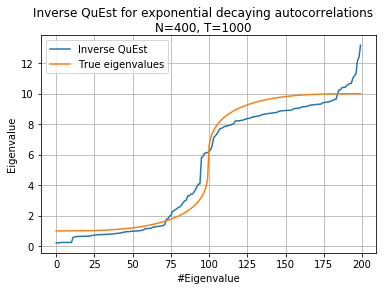

In [9]:
fig,ax = plt.subplots()
fig.suptitle("Inverse QuEst for exponential decaying autocorrelations\nN=400, T=1000")
ax.plot(sorted(inv_quest.x), label="Inverse QuEst")
ax.plot(true_eigvals, label="True eigenvalues")
ax.set_xlabel("#Eigenvalue")
ax.set_ylabel("Eigenvalue")
ax.grid()
ax.legend()

## Compare empirical eigenvalues to QuEST calculated using true eigenvalues and the ones estimated using inverse procedure

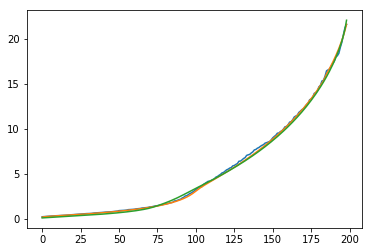

In [10]:
fig,ax = plt.subplots()
ax.plot(empirical_eigvals[:-1])
q = QuEST.QuEST(true_eigvals, r, gamma, k)
ax.plot(q.Q()[0])
q = QuEST.QuEST(inv_quest.x, r, gamma, k)
ax.plot(q.Q()[0])

## Compute square distances of empirical eigenvalues to QuEST given true eigenvalues

In [11]:
((QuEST.QuEST(true_eigvals, r, gamma, k).Q()[0] - empirical_eigvals[:-1])**2).sum()

4.3236689795059355